![](https://cdn.shopify.com/s/files/1/0053/6513/7472/products/newyorkcitysunset911.jpg?v=1544036357)
([Image Source](https://gettyphotography.com/products/new-york-city-empire-state-building-sunset-911))

# Table of Contents

[1. Acknowledgement](#1)<br>
&nbsp;&nbsp;&nbsp;[Introduction](#1.1)<br>
[2. Import Library](#2)<br>
[3. Data Cleaning](#3)<br>
[4. Exploratory Data Analysis (EDA)](#4)<br>
[5. Hypothesis](#5)<br>
[6. Conclusion](#6)<br>
[7. Summary](#7)<br>

# Ackowlegement<a id='1'></a>
This Notebook would not have been possible without the fantastic dataset provided by [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Also, shoutout to TKH volunteers: [Michael](https://www.linkedin.com/in/michael-lieberman-65786ba/), [Saurabh](https://www.linkedin.com/in/sauragar/) and our Instructors: Anil and [Malcolm](https://www.linkedin.com/in/malcolm-holliday/) who helped us with this project.

# Introduction<a id='1.1'></a>


[Airbnb](https://www.airbnb.com) is the biggest player in the short-term rental market, with more than 7 million listings in over 220 countries. Over the years, its rampant growth and lack of transparency have made it a target for everything from charges of fueling overtourism and turning formerly residential neighborhoods into tourist zones to enabling raucous parties despite complaints and virus-related restrictions on gatherings. 

### The COVID effect
The coronavirus has taken a massive toll on the travel industry, which in turn has created a major challenge for Airbnb. 

After laying off a quarter of its work force in the spring, Airbnb jettisoned some new ventures, including forays into transportation and entertainment, and hunkered down to focus on its core strength, lodging, even as its valuation fell from a high of \\$31 billion to, recently, \\$18 billion, according to The Wall Street Journal.

During the fourth quarter of last year, Airbnb raked in \\$1.11 billion in revenue. But by the second quarter of this year, which covered the height of the pandemic, Airbnb’s revenue had dwindled to \\$334.78 million, down 72% percent year-over-year. The rising number of cancellations and slowing number of bookings ballooned Airbnb’s losses to \\$575.6 million in the second quarter, compared to a loss of \\$297.4 million during the same period one year prior. 

Last year, prior to suffering any effects from the pandemic, the company lost \\$674.33 million, far greater than its \\$16.9 million loss in 2018. Meanwhile, in the first nine months of 2020, the company has already lost \\$696.9 million, more than during all of 2019. [source](https://fortune.com/2020/11/16/airbnb-ipo-initial-public-offering-coronavirus-impact/)

### Our Study
The aim of our study is to explore data produced by airbnb listings and look for factors that might have contributed to Airbnb sucess. Futhermore, find out if we can find any patterns and predict the location and price of a listing. 

## Technology Stack
In this analysis, we used python as the primary programming language because of its rich palette of tools that make data analysis a cinch. Some of the packages we used are:
1. [Matplotlib](https://matplotlib.org/) is an extremely versatile library of tools for generating interactive plots that are easy to interpret and customise.
2. [Numpy](https://github.com/numpy/numpy) is a popular library used for array manipulation and vector operations. It is used extensively across python projects that require scientific computing.
3. [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) is another library for data science that is just as popular as numpy. It provides easy to use data structures and functions to manipulate structured data.
4. [Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
5. [Sqlite3](https://www.sqlite.org/index.html) is a C library that provides a lightweight disk-based database that allows accessing the database using a nonstandard variant of the SQL query language.
6. [Folium](https://python-visualization.github.io/folium/) makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

These tools are well documented and come with several examples that make it easy to start using them. You can check out the linked documentation pages for more information.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import sqlite3 as sql

##### First, let's connect to our Database with sglite3.

In [81]:
db = 'project_2.db'
conn = sql.connect(db)

##### Then we can use read_sql to connect to our database. We'll need to pass in an SQL query to get information and the db connection.

In [82]:
df = pd.read_sql("SELECT * from airbnb2017", conn, index_col='index')
df

,id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,...,maximum_nights,calendar_updated,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month
index,,,,,,,,,,,,,,,,,,,,,
0,18461891,None,None,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,...,6,5 months ago,0,0,NaN,f,f,strict,f,NaN
1,20702398,within an hour,100%,f,t,City Island,40.849191,-73.786509,f,House,...,21,2 weeks ago,19,2,100.0,f,f,moderate,f,2.00
2,6627449,within an hour,100%,f,t,City Island,40.849775,-73.786609,t,Apartment,...,21,2 weeks ago,28,21,95.0,f,f,strict,f,0.77
3,19949243,within a few hours,100%,f,t,City Island,40.848838,-73.782276,f,Boat,...,1125,6 days ago,30,0,NaN,t,f,strict,f,NaN
4,1886820,None,None,f,t,City Island,40.841144,-73.783052,t,House,...,90,16 months ago,30,0,NaN,f,f,strict,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,20530309,within an hour,90%,f,t,Flatlands,40.618675,-73.932736,f,Apartment,...,1125,2 weeks ago,30,1,100.0,t,f,flexible,f,0.81
44313,20459907,within a few hours,100%,f,t,Bushwick,40.684681,-73.905174,t,Apartment,...,30,2 weeks ago,4,0,NaN,t,f,strict,f,NaN
44314,4287386,within an hour,100%,f,t,Rockaway Beach,40.583865,-73.819245,f,Apartment,...,60,2 weeks ago,1,6,87.0,f,f,moderate,f,3.91


In [83]:
# #Backup, reading directly from the csv file
# df = pd.read_csv('./New York.csv')

# Data Cleaning<a id='3'></a>

The most important step to take before we get started geenrating any kind of information from all these data sources, it is first important to clean our data and make sure that the datasets are compatible with each other. Since most of the data is divided on a host id basis, we must make sure that all the rows have values and cantain the same formatting. 

# Exploratory Data Analysis (EDA)<a id='4'></a>

##### Let's learn more about our dataset:

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44317 entries, 0 to 44316
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             44317 non-null  int64  
 1   host_response_time             30638 non-null  object 
 2   host_response_rate             30638 non-null  object 
 3   host_is_superhost              44085 non-null  object 
 4   host_has_profile_pic           44085 non-null  object 
 5   neighbourhood_cleansed         44317 non-null  object 
 6   latitude                       44317 non-null  float64
 7   longitude                      44317 non-null  float64
 8   is_location_exact              44317 non-null  object 
 9   property_type                  44317 non-null  object 
 10  room_type                      44317 non-null  object 
 11  accommodates                   44317 non-null  int64  
 12  bathrooms                      44173 non-null 

##### It seems that we have lots of columns with many empty values, we will need to figure out how to populate them.

In [85]:
df.isna().sum()

id                                   0
host_response_time               13679
host_response_rate               13679
host_is_superhost                  232
host_has_profile_pic               232
neighbourhood_cleansed               0
latitude                             0
longitude                            0
is_location_exact                    0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                          144
bedrooms                            73
beds                                91
bed_type                             0
amenities                            0
square_feet                      43768
price                                0
guests_included                      0
minimum_nights                       0
maximum_nights                       0
calendar_updated                     0
availability_30                      0
number_of_reviews                    0
review_scores_rating     

In [86]:
df.describe()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,number_of_reviews,review_scores_rating,reviews_per_month
count,4.431700e+04,44317.000000,44317.000000,44317.000000,44173.000000,44244.000000,44226.000000,549.000000,44317.000000,44317.000000,44317.000000,4.431700e+04,44317.000000,44317.000000,34218.000000,34843.000000
mean,1.149792e+07,40.730049,-73.954700,2.813255,1.132739,1.158892,1.555895,727.732240,147.675948,1.482388,4.008665,6.421371e+04,5.904484,18.145836,93.487492,1.446368
std,6.494719e+06,0.053905,0.042382,1.853114,0.412206,0.721120,1.071849,633.253518,209.138888,1.090597,12.574811,1.049199e+07,9.099126,33.066623,8.209607,1.638707
min,2.515000e+03,40.499794,-74.253269,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,20.000000,0.010000
25%,6.029332e+06,40.691219,-73.983490,2.000000,1.000000,1.000000,1.000000,325.000000,70.000000,1.000000,1.000000,2.900000e+01,0.000000,1.000000,90.000000,0.270000
50%,1.226806e+07,40.723624,-73.956728,2.000000,1.000000,1.000000,1.000000,700.000000,105.000000,1.000000,2.000000,1.125000e+03,0.000000,5.000000,96.000000,0.870000
75%,1.736896e+07,40.764029,-73.939366,4.000000,1.000000,1.000000,2.000000,925.000000,175.000000,2.000000,4.000000,1.125000e+03,9.000000,20.000000,100.000000,2.100000
max,2.117803e+07,40.909174,-73.710126,16.000000,15.500000,14.000000,40.000000,5000.000000,10000.000000,16.000000,1250.000000,2.147484e+09,30.000000,489.000000,100.000000,24.530000


## What should we look into / errors?
 - some rows have bathrooms of value 0 (min bathrooms);
 - some rows have bedrooms of value 0 (min bedrooms);
 - some rows have beds of value 0 (min beds);
 - some rows have square feet of value 0 (min square_feet);
 - some rows have price of value 0 (min price);
 - some rows have price of 10000 dollars per night (max price); 
 - there is a minimum nights reqirement stay of 1250 days (max minimum_nights);
 - 0 days availability for 30 days (min availability_30) - this one may be a legit requirement;
 - look into maximum_nights column format;

##### Let's drop the columns that have lots of empty values that we won't need. For now, these would be 'host_response_time', 'host_response_rate' and 'square_feet'. 

In [87]:
df = df.drop(['host_response_time','host_response_rate','square_feet'], axis=1)
df

,id,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,maximum_nights,calendar_updated,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month
index,,,,,,,,,,,,,,,,,,,,,
0,18461891,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,Entire home/apt,2,...,6,5 months ago,0,0,NaN,f,f,strict,f,NaN
1,20702398,f,t,City Island,40.849191,-73.786509,f,House,Private room,2,...,21,2 weeks ago,19,2,100.0,f,f,moderate,f,2.00
2,6627449,f,t,City Island,40.849775,-73.786609,t,Apartment,Entire home/apt,3,...,21,2 weeks ago,28,21,95.0,f,f,strict,f,0.77
3,19949243,f,t,City Island,40.848838,-73.782276,f,Boat,Entire home/apt,4,...,1125,6 days ago,30,0,NaN,t,f,strict,f,NaN
4,1886820,f,t,City Island,40.841144,-73.783052,t,House,Entire home/apt,4,...,90,16 months ago,30,0,NaN,f,f,strict,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,20530309,f,t,Flatlands,40.618675,-73.932736,f,Apartment,Private room,1,...,1125,2 weeks ago,30,1,100.0,t,f,flexible,f,0.81
44313,20459907,f,t,Bushwick,40.684681,-73.905174,t,Apartment,Entire home/apt,6,...,30,2 weeks ago,4,0,NaN,t,f,strict,f,NaN
44314,4287386,f,t,Rockaway Beach,40.583865,-73.819245,f,Apartment,Entire home/apt,4,...,60,2 weeks ago,1,6,87.0,f,f,moderate,f,3.91


## Host Information / Policy

In [177]:
print('number of unique host: ', len(df['id'].unique()))
df['id'].value_counts()

number of unique host:  44317


3344383     1
20479521    1
10031436    1
7238041     1
7982483     1
           ..
713385      1
147474      1
20286116    1
13512783    1
15423731    1
Name: id, Length: 44317, dtype: int64

##### All host IDs are unique, nothing is repeating, which most likely means that even if the same Host posts another property, she will get a second ID for it.

##### Let's fill up the host_is_superhost column with the mode value.

In [89]:
df["host_is_superhost"] = df["host_is_superhost"].fillna(df["host_is_superhost"].mode()[0])

##### Let's fill up the host_has_profile_pic with the mode value.

In [90]:
df["host_has_profile_pic"] = df["host_has_profile_pic"].fillna(df["host_has_profile_pic"].mode()[0])

##### Most host have profile picture, this is apparenly important for successful AirBnB listing. Only 124 host ids do not have picture.

In [91]:
df["host_has_profile_pic"].value_counts()

t    44193
f      124
Name: host_has_profile_pic, dtype: int64

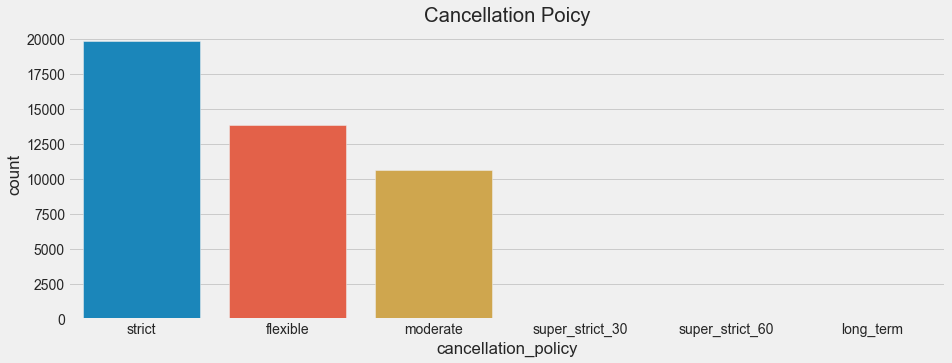

In [164]:
fig, ax= plt.subplots(figsize=(14,5))
sns.countplot('cancellation_policy',data=df,order=df['cancellation_policy'].value_counts().index).set_title('Cancellation Poicy')
plt.show()

##### As we could see in the chart above for Cancellation Policy and the count of values below, most values are for strict, flexible and moderate.

In [157]:
df['cancellation_policy'].value_counts()

strict             19815
flexible           13830
moderate           10655
super_strict_30       13
super_strict_60        3
long_term              1
Name: cancellation_policy, dtype: int64

## Apparments/rooms

##### Now let's explore the types of rooms and apartments offered.

##### We have 144 empty rows for the bathrooms column, so we will fill up the bathrooms empty rows with the mode.

In [92]:
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms"].mode()[0])

##### We will also fill up the empty bedroom values (73) with the mode for the bedroom column.

In [93]:
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].mode()[0])

##### For the bed column we have also decided to use the mode value, which is 1, since that is the most common one and it appears over 29000 times. The empty rows here are 91.

In [94]:
df["beds"] = df["beds"].fillna(df["beds"].mode()[0])

Text(0.5, 1.0, 'Room Type')

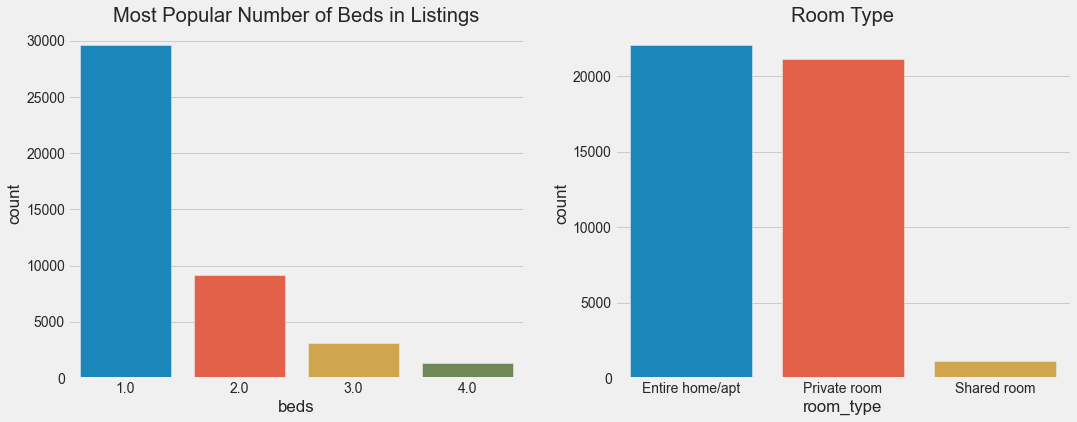

In [176]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,6))
sns.countplot('beds',data=df,ax=ax1,order=df['beds'].value_counts()[:4].index).set_title('Most Popular Number of Beds in Listings')
sns.countplot('room_type',data=df,ax=ax2,order=df['room_type'].value_counts().index).set_title('Room Type')

##### The above charts represents the most populat number of beds in our dataframe and a representation of the types of rooms offered. We may need to remove the shared room type later for our model if we want to turn this column into binary. It is a very smal fraction of the other 2 values. But for now we will keep it as is.

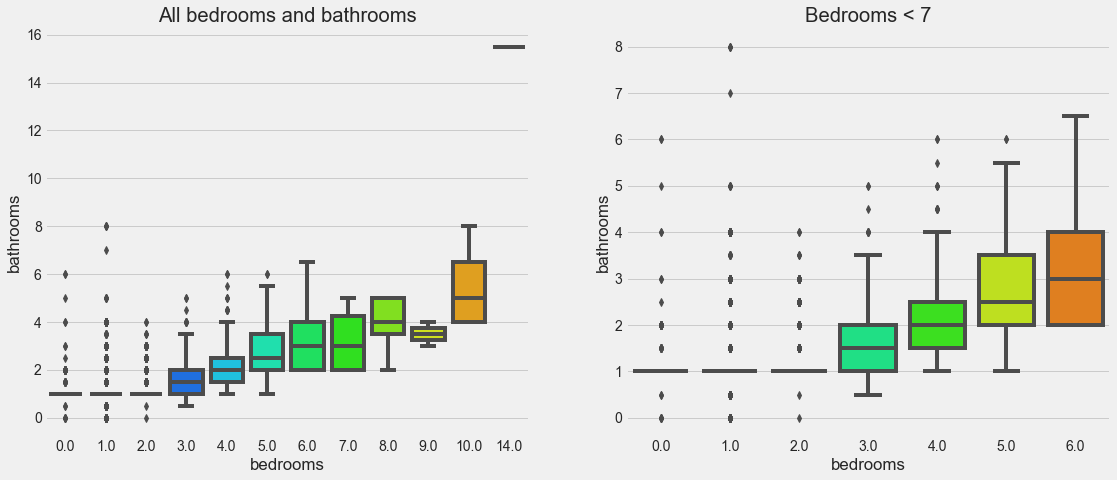

In [175]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(17,7))
sns.boxplot(data=df, x='bedrooms', y='bathrooms', palette='gist_rainbow_r', ax=ax1).set_title('All bedrooms and bathrooms') 
sns.boxplot(data=df.loc[df['bedrooms'] < 7], x='bedrooms', y='bathrooms', palette='gist_rainbow_r', ax=ax2).set_title('Bedrooms < 7')
plt.show()

##### The above charts represent a correlation showing that the more bedrooms there are in the apt, the more the bathrooms in it.

##### We are going to parse through the amenities column and we will look for Wireless Access. Them we will create a separate column for the corresponding row which wil show True (t) of False (f) values for whether there is wifi. We may need this feature for our model later.

In [97]:
df["wifi_access"] = df["amenities"].apply(lambda x: 't' if "Wireless Internet" in x else 'f')
df

,id,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,calendar_updated,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month,wifi_access
index,,,,,,,,,,,,,,,,,,,,,
0,18461891,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,Entire home/apt,2,...,5 months ago,0,0,NaN,f,f,strict,f,NaN,t
1,20702398,f,t,City Island,40.849191,-73.786509,f,House,Private room,2,...,2 weeks ago,19,2,100.0,f,f,moderate,f,2.00,t
2,6627449,f,t,City Island,40.849775,-73.786609,t,Apartment,Entire home/apt,3,...,2 weeks ago,28,21,95.0,f,f,strict,f,0.77,t
3,19949243,f,t,City Island,40.848838,-73.782276,f,Boat,Entire home/apt,4,...,6 days ago,30,0,NaN,t,f,strict,f,NaN,f
4,1886820,f,t,City Island,40.841144,-73.783052,t,House,Entire home/apt,4,...,16 months ago,30,0,NaN,f,f,strict,f,NaN,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,20530309,f,t,Flatlands,40.618675,-73.932736,f,Apartment,Private room,1,...,2 weeks ago,30,1,100.0,t,f,flexible,f,0.81,t
44313,20459907,f,t,Bushwick,40.684681,-73.905174,t,Apartment,Entire home/apt,6,...,2 weeks ago,4,0,NaN,t,f,strict,f,NaN,t
44314,4287386,f,t,Rockaway Beach,40.583865,-73.819245,f,Apartment,Entire home/apt,4,...,2 weeks ago,1,6,87.0,f,f,moderate,f,3.91,f


Text(0.5, 1.0, 'Wireless Access')

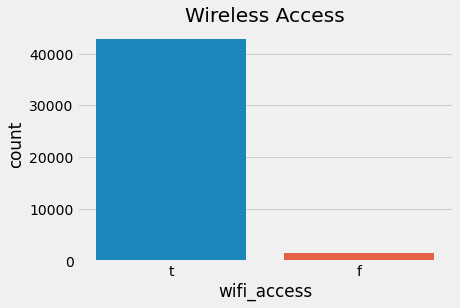

In [98]:
sns.countplot('wifi_access',data=df,order=df['wifi_access'].value_counts().index).set_title('Wireless Access')

##### As we can see almost all of the places offer wifi, that must be considered important for the travellers since almost every host offers it.

## Reviews

##### We will fill up the empty values (9474) for reviews_per_month with 0.

In [100]:
df['reviews_per_month'] = df["reviews_per_month"].fillna(0)

##### For the reviews scores rating we will fill up the empty values with the median, grouped by number of reviews and reviews per month for better accuracy.

In [101]:
df["review_scores_rating"] = df.groupby(["number_of_reviews", "reviews_per_month"])["review_scores_rating"].apply(lambda x:x.fillna(x.median()))

##### Even after we executed the above line, we still remain with some empty values, them we will fill up with 0.

In [102]:
df['review_scores_rating'] = df["review_scores_rating"].fillna(0)

##### At this point we shouldn't have any more NaN/empty values. Let's doubleckeck.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44317 entries, 0 to 44316
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             44317 non-null  int64  
 1   host_is_superhost              44317 non-null  object 
 2   host_has_profile_pic           44317 non-null  object 
 3   neighbourhood_cleansed         44317 non-null  object 
 4   latitude                       44317 non-null  float64
 5   longitude                      44317 non-null  float64
 6   is_location_exact              44317 non-null  object 
 7   property_type                  44317 non-null  object 
 8   room_type                      44317 non-null  object 
 9   accommodates                   44317 non-null  int64  
 10  bathrooms                      44317 non-null  float64
 11  bedrooms                       44317 non-null  float64
 12  beds                           44317 non-null 

##### Now let's save our updated/cleaned table in sql with the followin command:

In [104]:
df.to_sql("updated_airbnb2017", conn, if_exists="replace")

In [105]:
df

,id,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,calendar_updated,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month,wifi_access
index,,,,,,,,,,,,,,,,,,,,,
0,18461891,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,Entire home/apt,2,...,5 months ago,0,0,0.0,f,f,strict,f,0.00,t
1,20702398,f,t,City Island,40.849191,-73.786509,f,House,Private room,2,...,2 weeks ago,19,2,100.0,f,f,moderate,f,2.00,t
2,6627449,f,t,City Island,40.849775,-73.786609,t,Apartment,Entire home/apt,3,...,2 weeks ago,28,21,95.0,f,f,strict,f,0.77,t
3,19949243,f,t,City Island,40.848838,-73.782276,f,Boat,Entire home/apt,4,...,6 days ago,30,0,0.0,t,f,strict,f,0.00,f
4,1886820,f,t,City Island,40.841144,-73.783052,t,House,Entire home/apt,4,...,16 months ago,30,0,0.0,f,f,strict,f,0.00,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,20530309,f,t,Flatlands,40.618675,-73.932736,f,Apartment,Private room,1,...,2 weeks ago,30,1,100.0,t,f,flexible,f,0.81,t
44313,20459907,f,t,Bushwick,40.684681,-73.905174,t,Apartment,Entire home/apt,6,...,2 weeks ago,4,0,0.0,t,f,strict,f,0.00,t
44314,4287386,f,t,Rockaway Beach,40.583865,-73.819245,f,Apartment,Entire home/apt,4,...,2 weeks ago,1,6,87.0,f,f,moderate,f,3.91,f


## Information per neighbourhood (neighbourhood_cleansed)

In [106]:
data = folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df[['latitude','longitude']],radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(data)
display(data)

##### Here is a representation of the AirBnB listings in our dataset based on longtitude and latitude, visually represented on NYC's map.

##### The highest Density areas are marked in red and lowest density areas are marked in blue color.

In [107]:
len(df['neighbourhood_cleansed'].unique())

217

##### There are 217 unique neighbourhoods in the Dataframe.

##### Here is a chart of the 10 neighbourhoods that offer most amount of listings:

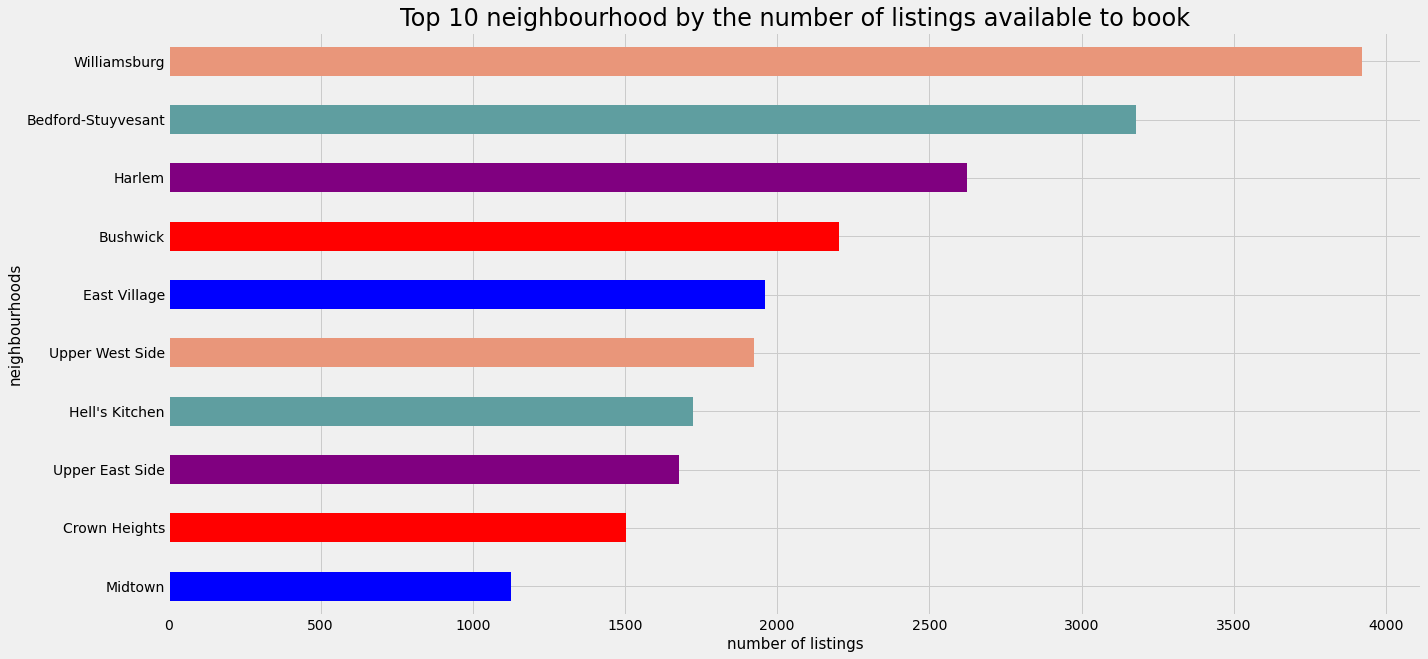

In [108]:
from matplotlib import style

plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("blue", "red", "purple",'cadetblue','darksalmon')
df.neighbourhood_cleansed.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=color)
ax.set_title("Top 10 neighbourhood by the number of listings available to book",size=24)
ax.set_xlabel('number of listings',size=15)
ax.set_ylabel('neighbourhoods', size=15)
plt.show()

## Standardize Borough Names

### Steps followed:
- Identify a dictionary with neighbor:borough relationship 
- Plan on how to parse the neighborhood column so we can produce a new column with each borough 
- Implement in code 

##### Now, let's create a column that  will group all the neighbourhoods into 5 boroughs. We may need this later for our model.

##### For the purpose of this, we are cross-referencing another similar AirBnb database that has the 5 boroughs and the neighbourhoods that belong to them. We will use the info from the opennyc dataset to create a dictionary and thenuse that dictionary to assign a borough to each neighbourhood, in a separate colomn.

In [109]:
df2 = pd.read_sql("SELECT * from opennyc", conn, index_col='index')

In [110]:
info = df2.groupby(["neighbourhood","neighbourhood_group"])

In [111]:
pd.DataFrame(info)[0]

0                   (Allerton, Bronx)
1      (Arden Heights, Staten Island)
2           (Arrochar, Staten Island)
3                   (Arverne, Queens)
4                   (Astoria, Queens)
                    ...              
216       (Windsor Terrace, Brooklyn)
217               (Woodhaven, Queens)
218                 (Woodlawn, Bronx)
219          (Woodrow, Staten Island)
220                (Woodside, Queens)
Name: 0, Length: 221, dtype: object

In [112]:
data= {key:value for key,value in pd.DataFrame(info)[0]}

##### Some of the neighbourhoods didn't appear in the opennyc database, so we had to assign them them manually:

In [113]:
data['Gerritsen Beach']= 'Brooklyn'
data['Glen Oaks']= 'Queens'
data['Hollis Hills']= 'Queens'

##### Let's create a Lambda function to match each neighbourhood to a borough and create a new colomn.

In [114]:
df["borough"] = df["neighbourhood_cleansed"].apply(lambda x:data[x])

##### Here is our dictionary that we used: 

In [115]:
data

{'Allerton': 'Bronx',
 'Arden Heights': 'Staten Island',
 'Arrochar': 'Staten Island',
 'Arverne': 'Queens',
 'Astoria': 'Queens',
 'Bath Beach': 'Brooklyn',
 'Battery Park City': 'Manhattan',
 'Bay Ridge': 'Brooklyn',
 'Bay Terrace': 'Queens',
 'Bay Terrace, Staten Island': 'Staten Island',
 'Baychester': 'Bronx',
 'Bayside': 'Queens',
 'Bayswater': 'Queens',
 'Bedford-Stuyvesant': 'Brooklyn',
 'Belle Harbor': 'Queens',
 'Bellerose': 'Queens',
 'Belmont': 'Bronx',
 'Bensonhurst': 'Brooklyn',
 'Bergen Beach': 'Brooklyn',
 'Boerum Hill': 'Brooklyn',
 'Borough Park': 'Brooklyn',
 'Breezy Point': 'Queens',
 'Briarwood': 'Queens',
 'Brighton Beach': 'Brooklyn',
 'Bronxdale': 'Bronx',
 'Brooklyn Heights': 'Brooklyn',
 'Brownsville': 'Brooklyn',
 "Bull's Head": 'Staten Island',
 'Bushwick': 'Brooklyn',
 'Cambria Heights': 'Queens',
 'Canarsie': 'Brooklyn',
 'Carroll Gardens': 'Brooklyn',
 'Castle Hill': 'Bronx',
 'Castleton Corners': 'Staten Island',
 'Chelsea': 'Manhattan',
 'Chinatown': 'M

In [179]:
df.head()

,id,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month,wifi_access,borough
index,,,,,,,,,,,,,,,,,,,,,
0,18461891,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,Entire home/apt,2,...,0,0,0.0,f,f,strict,f,0.00,t,Queens
1,20702398,f,t,City Island,40.849191,-73.786509,f,House,Private room,2,...,19,2,100.0,f,f,moderate,f,2.00,t,Bronx
2,6627449,f,t,City Island,40.849775,-73.786609,t,Apartment,Entire home/apt,3,...,28,21,95.0,f,f,strict,f,0.77,t,Bronx
3,19949243,f,t,City Island,40.848838,-73.782276,f,Boat,Entire home/apt,4,...,30,0,0.0,t,f,strict,f,0.00,f,Bronx
4,1886820,f,t,City Island,40.841144,-73.783052,t,House,Entire home/apt,4,...,30,0,0.0,f,f,strict,f,0.00,t,Bronx


In [117]:
df['borough'].value_counts()

Manhattan        20370
Brooklyn         18470
Queens            4392
Bronx              791
Staten Island      294
Name: borough, dtype: int64

##### As we can see, this is the borough listing representation in our dataset.

##### The listings are mostly in Manhattan and Brooklyn.

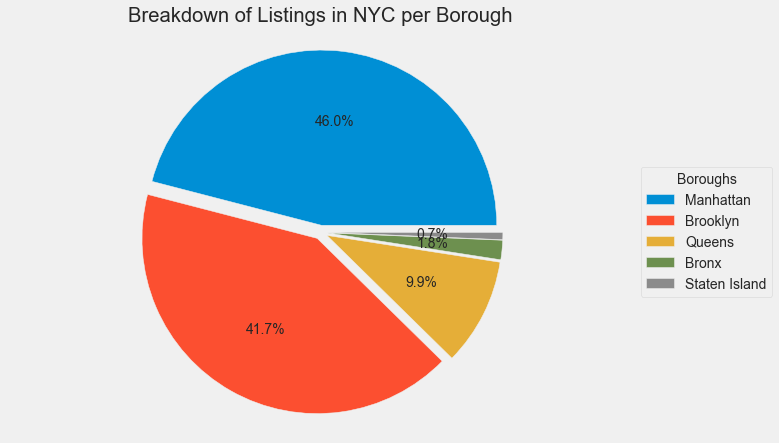

In [185]:
plt.style.use('fivethirtyeight')
#plt.style.use('tableau-colorblind10')
fig, axes = plt.subplots(figsize=(10,7))
axes.set(title="Breakdown of Listings in NYC per Borough")
labels = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
wedges, texts, autotexts = axes.pie(df['borough'].value_counts(), explode=(0.04,0.04,0.04,0.04,0.04), shadow=False, startangle=0, autopct='%1.1f%%')
axes.legend(wedges, labels, title = 'Boroughs', loc = 'center left', bbox_to_anchor = (1,0,0.5,1))
axes.axis('equal')


plt.show()

##### And, let's save again our cleaned/updated dataset into the sql table.

In [119]:
df.to_sql("updated_airbnb2017", conn, if_exists="replace")

## Availability / Requirements on Min/Max Nights per stay

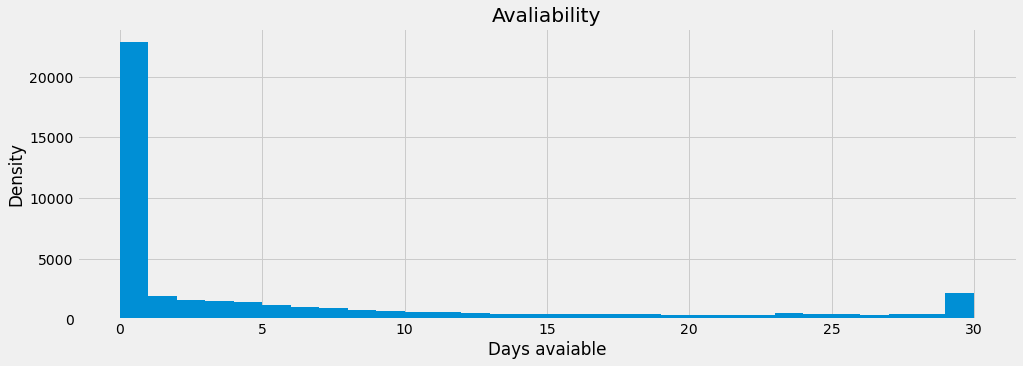

In [120]:
#plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(df['availability_30'], bins = 30)
plt.title('Avaliability')
plt.xlabel('Days avaiable')
plt.ylabel('Density') 
plt.show()

In [121]:
len(df[df['availability_30'] == 0])

22911

##### A lot of Listings have 0 days availability, probably because they were either fully booked or because they were frozen/currently not being rented at the time this dataset was created. They are most likely not wrong values. We will keep them as is.

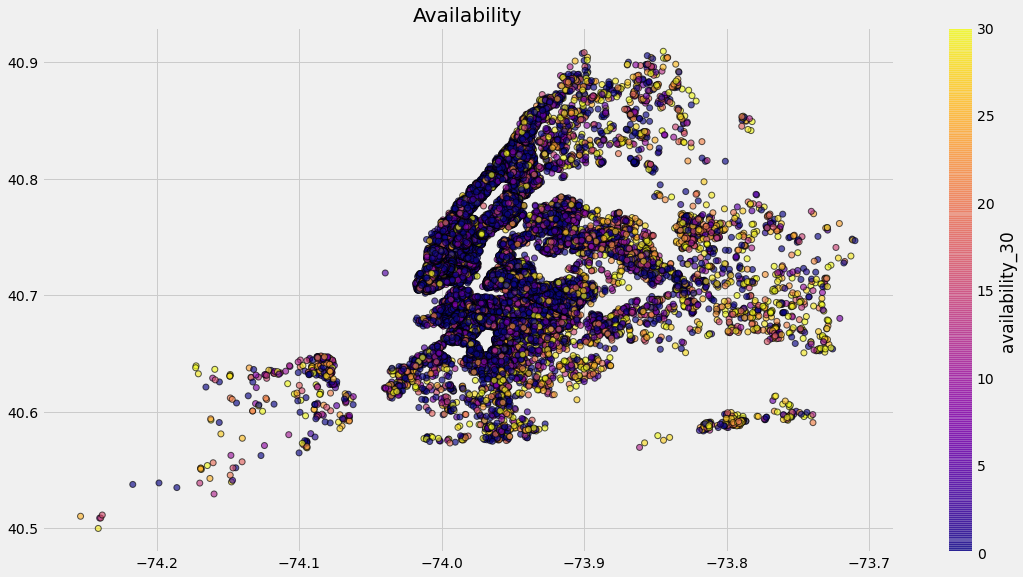

In [122]:
plt.figure(figsize=(17,9))
plt.scatter(df.longitude, df.latitude, c=df.availability_30, cmap='plasma', edgecolor='black', linewidth=1, alpha=0.65)
cbar = plt.colorbar()
cbar.set_label('availability_30')
plt.title('Availability')
plt.show()

##### Here is another representation (scatter plot) of the avaliaility of listings per neighbourhood. The Yellow color on the map shows the places which have more availability per month, meaning that they are being avaliable more often as opposed to other listings which are rented on seasonal basis.

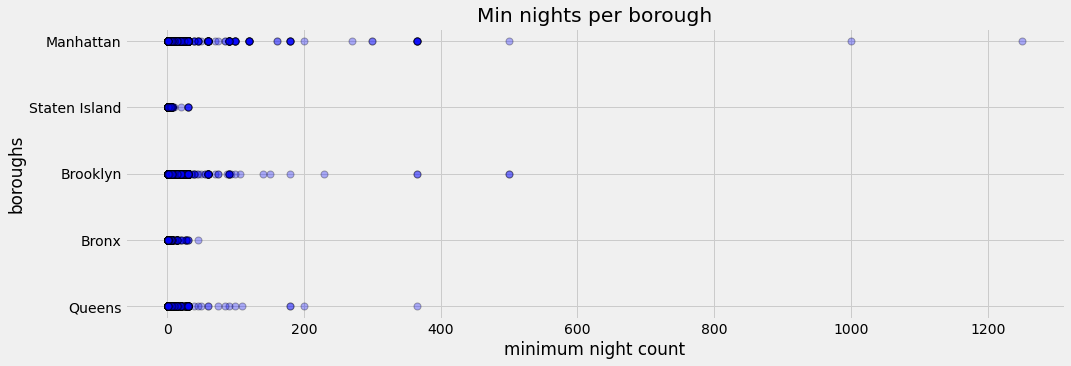

In [123]:
#plt.style.use('tableau-colorblind10')
x = df['minimum_nights'].values
y = df['borough'].values
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x,y, s=50, c="b", alpha=0.3, edgecolors="black", linewidth=1)
ax.set_xlabel('minimum night count')
ax.set_ylabel('boroughs')
ax.set_title('Min nights per borough')
plt.show()

##### There are definitely values that need to be removed, is it realistic to have minimum night requirement of 1200? For sure not. How about 400 or 200 night required as a minimum stay? Not really realistic. For the pupose of our model in the next part of this Notebook we will have to take that into consideration later and sort values to exclude the outliers.

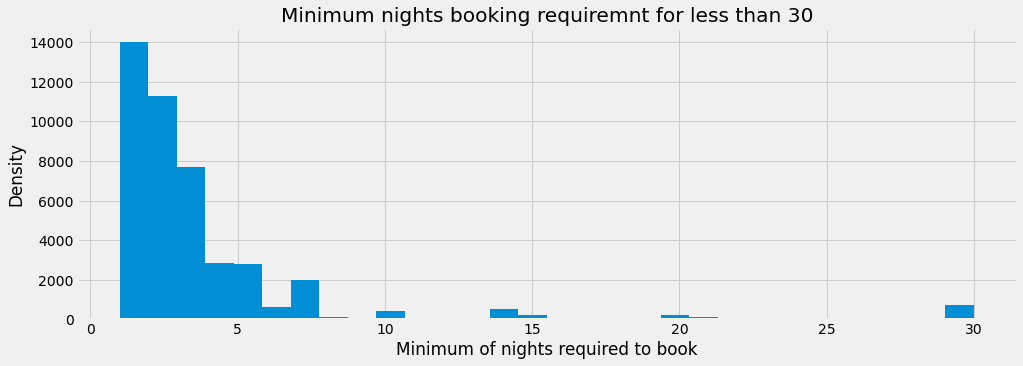

In [125]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins = 30)
plt.title('Minimum nights booking requiremnt for less than 30')
plt.xlabel('Minimum of nights required to book')
plt.ylabel('Density')
plt.show()

##### These represent some of the most common values for minimum nights rquirement. The middle values is 2, the most common minimum_nights value is 1, and the average is 4. Since there are defenitely some outliers here, the mean is probably not the most accurate representation.

In [126]:
df['minimum_nights'].median()

2.0

In [127]:
df['minimum_nights'].mode()

0    1
dtype: int64

In [128]:
df['minimum_nights'].mean()

4.0086648464471875

## Price

##### Price is a variable that we will later try to predict in our model, so let's see what is the price distribution and relationship with the other varibles.

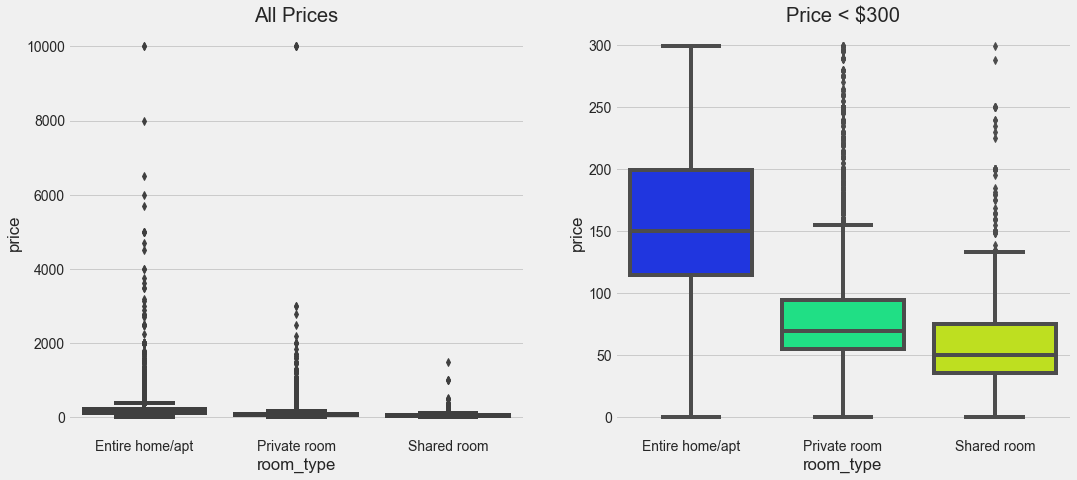

In [189]:
#plt.style.use('tableau-colorblind10')
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,7))
sns.boxplot(data=df, x='room_type', y='price', palette='Paired', ax=ax1).set_title('All Prices') 
sns.boxplot(data=df.loc[df['price'] < 300], x='room_type', y='price', palette='gist_rainbow_r', ax=ax2).set_title('Price < $300')
plt.show()

##### It seems that there are a few price outliers of $10000, let's see how many and what they are.

##### Also, it seems that the price distribution looks more normal for prices under 300 dollars a night. We can see the breakdown per room type. Apparently, it's most expensive to rent an entire apt, followed y pprivate room and shared room.

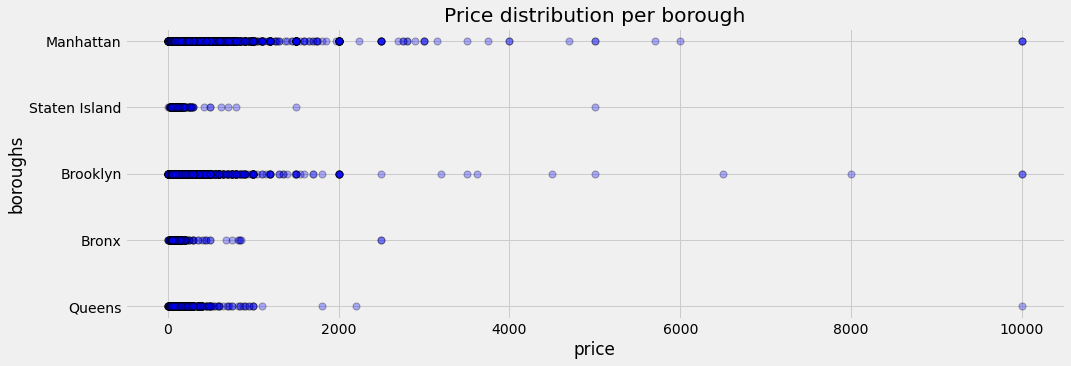

In [130]:
x = df['price'].values
y = df['borough'].values
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x,y, s=50, c="b", alpha=0.3, edgecolors="black", linewidth=1)
ax.set_xlabel('price')
ax.set_ylabel('boroughs')
ax.set_title('Price distribution per borough')
plt.show()

##### There are a few outliers that are about 10000 dollars a night, these maybe mistakes but they also mybe true for luxury properties.

##### We will leave them as they are, even though they are not any close to the average price distribution. For our model, we will sort the values and exclude the outliers.

In [131]:
df['price'].sort_values(ascending=False).head(10)

index
14607    10000
816      10000
32844    10000
28243     9999
13911     9999
37747     9998
10362     8000
10200     6500
20880     6000
23438     5700
Name: price, dtype: int64

##### Locating prices that may be a mistake, looking for anything less thann 10 dollars per night. We have some columns that have price of 0/1/5 dollars per night. We will need to exclude those for our model.

In [132]:
df.loc[df['price'] < 10]['price']

index
455      0
467      0
495      0
2119     0
2976     0
3596     0
3601     0
3772     0
4667     0
5144     0
7194     0
7882     0
8105     0
8394     0
10000    0
10062    0
12427    0
13023    0
13127    0
13926    0
14364    0
14369    0
16547    0
18148    0
18233    0
18423    0
19072    0
19296    0
19306    0
20262    0
20503    0
21650    0
25367    0
25904    0
28375    0
29127    0
29149    0
30649    0
31202    1
31222    0
31899    0
34991    0
36168    0
37016    0
37932    0
37986    5
40727    0
42368    0
42557    0
42888    0
43311    0
43741    0
Name: price, dtype: int64

##### Here is a barplot which groups the data by borough and room type and tells us the price distribution.

##### This plot tells us that Manhattan is the most expensive borough, the price of entire home/apt is more than any other room type, and that Bronx is the cheapest.

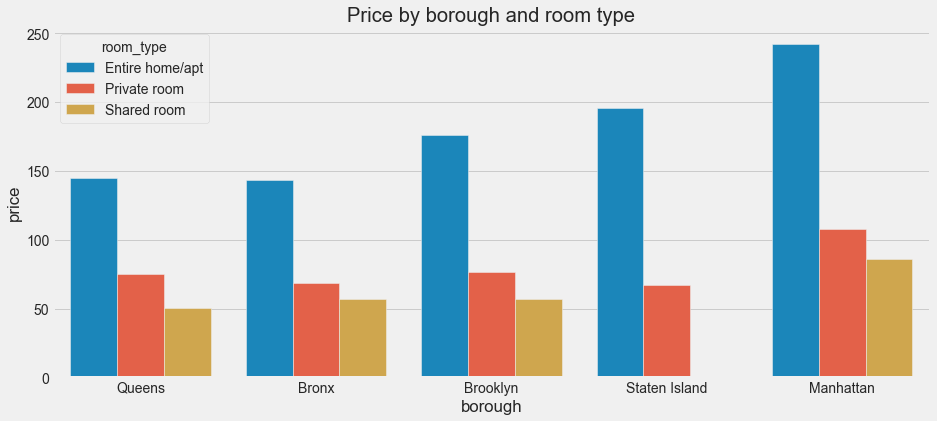

In [190]:
plt.figure(figsize=(14, 6))
sns.barplot(df.borough, df.price, hue=df.room_type, ci=None).set_title('Price by borough and room type')
plt.show()

##### Let's find out the average price for each borough and plot some charts on the top most expensive neighbourhoods. For this, we will need to calculate and save the average price into a new dataset, for each borough.

In [135]:
n_price = df.groupby(['borough','neighbourhood_cleansed'])[['price']].mean()
n_price.reset_index(inplace=True)
n_price.rename(columns={'price':'avg_price'}, inplace=True)
n_price = n_price.sort_values(by=['avg_price'], ascending=False)
n_price = n_price.round(2)

price_man = n_price.loc[n_price['borough'] == 'Manhattan'].sort_values(by='avg_price', ascending=False)[:5]
price_bklyn = n_price.loc[n_price['borough'] == 'Brooklyn'].sort_values(by='avg_price', ascending=False)[:5]
price_queens = n_price.loc[n_price['borough'] == 'Queens'].sort_values(by='avg_price', ascending=False)[:5]
price_bronx = n_price.loc[n_price['borough'] == 'Bronx'].sort_values(by='avg_price', ascending=False)[:5]
price_si = n_price.loc[n_price['borough'] == 'Staten Island'].sort_values(by='avg_price', ascending=False)[:5]

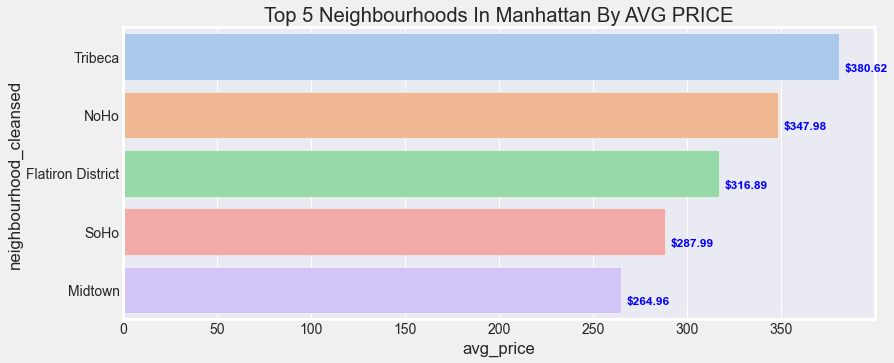

In [136]:
#plt.style.use('tableau-colorblind10')
plt.figure(figsize=(12, 5))
sns.set_style("darkgrid")
ax = sns.barplot(x='avg_price',y='neighbourhood_cleansed', data=price_man, palette='pastel')
plt.title('Top 5 Neighbourhoods In Manhattan By AVG PRICE')
for i, v in enumerate(price_man['avg_price']):
    ax.text(v + 3, i + .25, ('$'+str(v)), color='blue', fontsize=12, fontweight='bold')
plt.show()

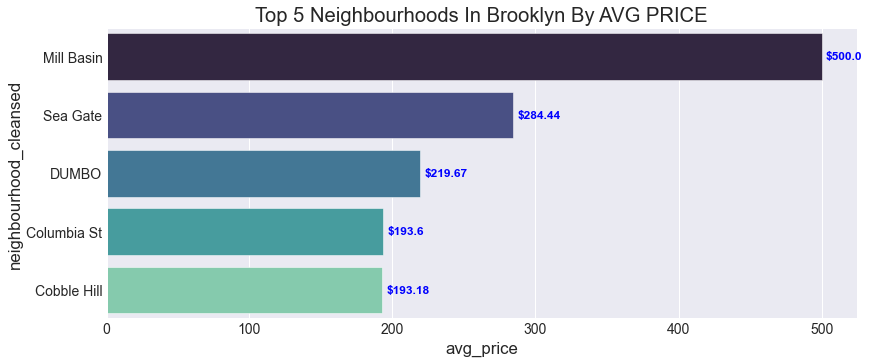

In [137]:
#plt.style.use('tableau-colorblind10')
plt.figure(figsize=(12, 5))
sns.set_style("darkgrid")
ax = sns.barplot(x='avg_price',y='neighbourhood_cleansed', data=price_bklyn, palette='mako')
plt.title('Top 5 Neighbourhoods In Brooklyn By AVG PRICE')
for i, v in enumerate(price_bklyn['avg_price']):
    ax.text(v+3, i, ('$'+str(v)), color='blue', va='center', fontsize=12, fontweight='bold')
plt.show()

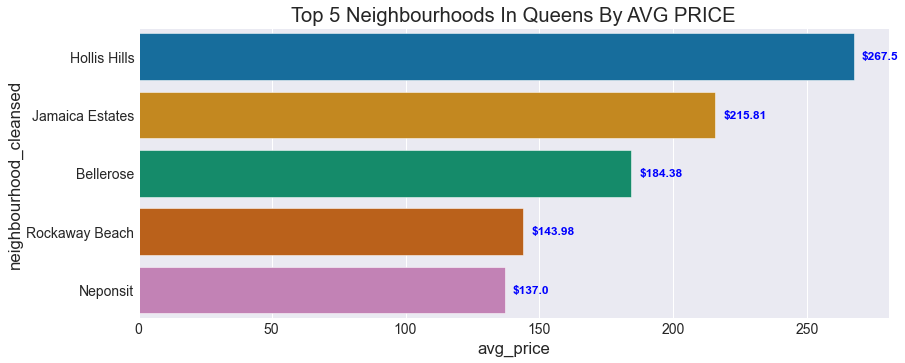

In [138]:
#plt.style.use('tableau-colorblind10')
plt.figure(figsize=(12, 5))
sns.set_style("darkgrid")
ax = sns.barplot(x='avg_price',y='neighbourhood_cleansed', data=price_queens, palette='colorblind')
plt.title('Top 5 Neighbourhoods In Queens By AVG PRICE')
for i, v in enumerate(price_queens['avg_price']):
    ax.text(v+3, i, ('$'+str(v)), color='blue', va='center', fontsize=12, fontweight='bold')
plt.show()

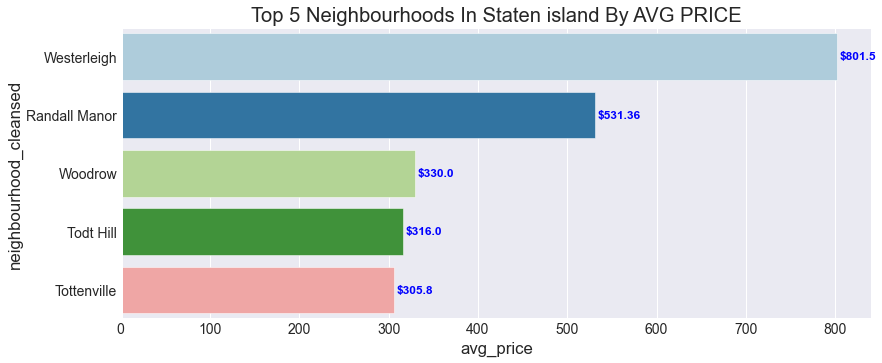

In [139]:
#plt.style.use('tableau-colorblind10')
plt.figure(figsize=(12, 5))
sns.set_style("darkgrid")
ax = sns.barplot(x='avg_price',y='neighbourhood_cleansed', data=price_si, palette='Paired')
plt.title('Top 5 Neighbourhoods In Staten island By AVG PRICE')
for i, v in enumerate(price_si['avg_price']):
    ax.text(v+3, i, ('$'+str(v)), color='blue', va='center', fontsize=12, fontweight='bold')
plt.show()

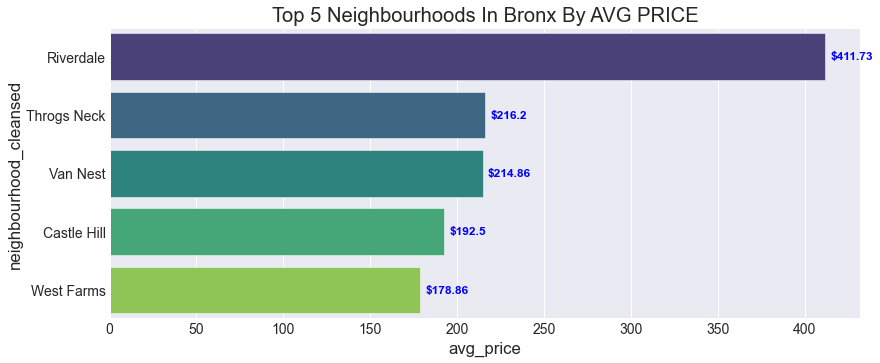

In [140]:
#plt.style.use('tableau-colorblind10')
plt.figure(figsize=(12, 5))
sns.set_style("darkgrid")
ax = sns.barplot(x='avg_price',y='neighbourhood_cleansed', data=price_bronx, palette='viridis')
plt.title('Top 5 Neighbourhoods In Bronx By AVG PRICE')
for i, v in enumerate(price_bronx['avg_price']):
    ax.text(v+3, i, ('$'+str(v)), color='blue', va='center', fontsize=12, fontweight='bold')
plt.show()

##### The following is a Correlation Bar Graph of price with other features. We see that 'price' is ost closely correlated to 'accommodates'.

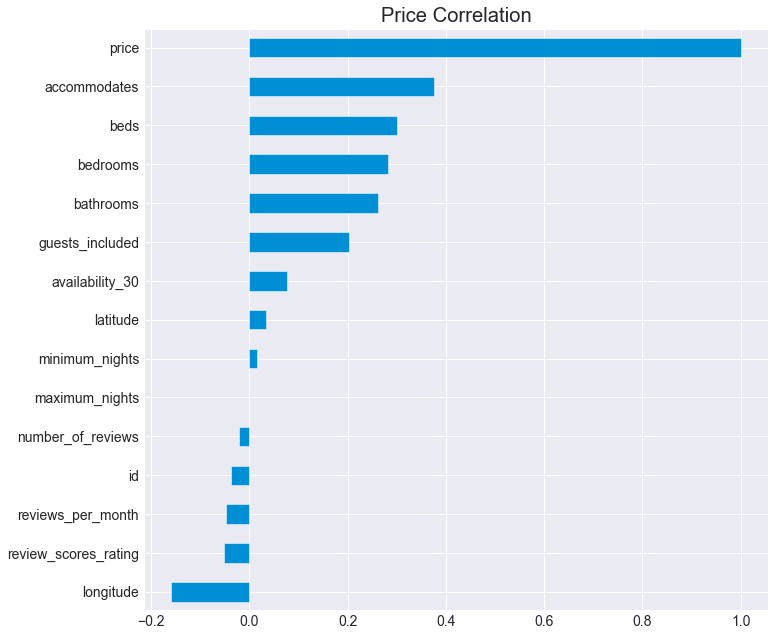

In [151]:
plt.figure(figsize=(10,10))
df.corr()["price"].sort_values().plot(kind="barh").set_title("Price Correlation")
plt.show()

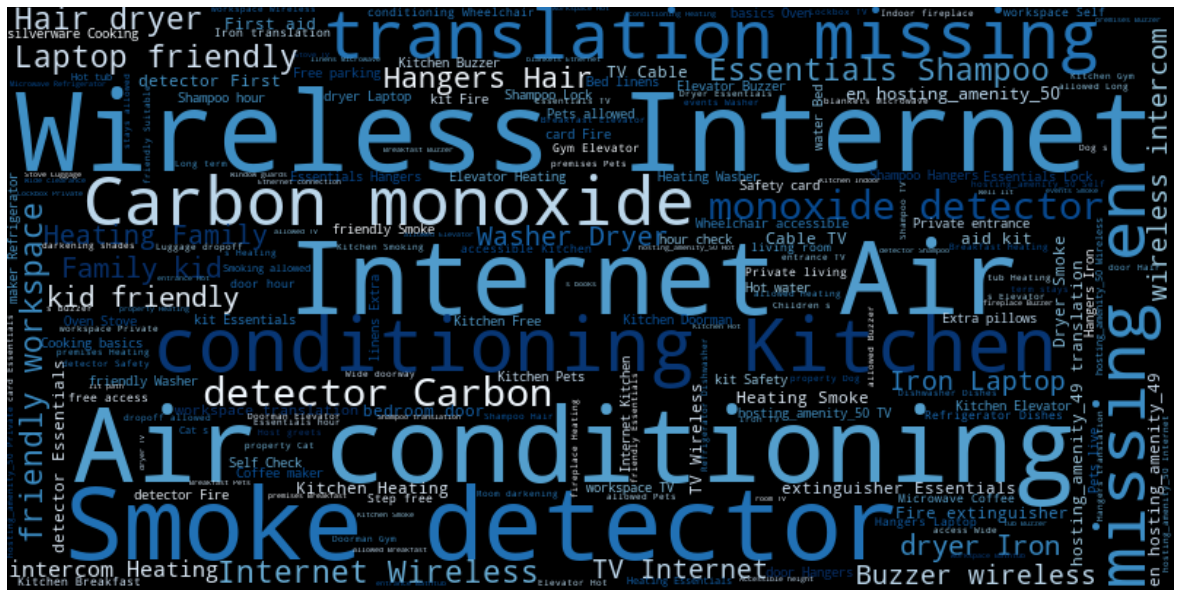

In [63]:
#word cloud  
#Put this all the way at the end - after the model and conclusion.


from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
text = " ".join(str(each) for each in df.amenities)
# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400, margin=0,colormap='Blues').generate(text)
# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
#this cloud be our banner at the end

# Hypothesis <a id='5'></a>
#### What do we understand from this? 

We see that so far, the Pfizer Vaccine and BioNTech have been making the fastest growth, most likely since this is the one that is prominently being adminstered in the USA which as we saw, is leading in terms of daily vaccinations. We also see rapid growth for CNBG, Sinovac, the prominent combination from China. We hope that very soon, as vaccinations become more easily accessible and affordable, all line graphs see an upward trend, matching that of USA and China. 

# Conclusion<a id='6'></a>

The above graphs shows how slowly but surely, the vaccines are being administered in increasingly large numbers each day. If we look carefully, we can also identify a slight downward trend in the number of new cases each day, as the vaccinations progress. Humanity is on its way to victory!

COVID-19 has taken a heavy toll on mankind. We have lost far too many people and suffered too much for too long. Now is the time to fight back. Let 2021 be the year we reclaim what 2020 took from us. Regardless of what people might say, always wear a mask when out in public and maintain social distancing. DO NOT give in hearsay! Only when all of the graphs plotted inthe innumerable notebooks posted by the talented people on Kaggle point heavily in our favour, having dwarfed the damage this pandemic has already done, will be be able to call it a victory. 

## TOGETHER, WE CAN!

# Summary<a id='7'></a>

Work Completed as of 05-02-2021: 

- **Data Cleaning** : Preprocessing and standardization.
- **Data Summarization** : Combine the daily vaccine information with the existing virus summary.
- **Summary Visualizations** : Generate attractive bar plots for various summaries.
- **Global Statistics Visualization** : Compare the daily new cases, active cases and deaths. 
- **Vaccine Preferences** : Visualize the vaccine combinations in use around the globe.
- **Covid-19 by Continents** : Visualize the total confirmed cases by continents.
- **Vaccination Progression** : Visualize clearly how the vaccination have been progressing across the globe. 
- **Rate of Vaccination by Country** : Visualise how each of the top-10 countries have been administering the vaccine
- **Vaccine vs Virus** : Comparing the global vaccination effort against the spread of the virus.
- **The Race Against Covid** : Comparing the cumulative numbers for the virus and the vaccine.
- **Vaccine Breakdown** : Visualizing how each vaccine has been administered over time.

Thanks for taking the time to read this notebook. If you liked it, an **UPVOTE** is massively encouraging! 
I will try to keep this notebook updated and add in more visualizations in the future so be sure to check back soon!